In [303]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

x = pd.read_csv(r"Desktop\Python Projekte\dd.csv", sep=";") #Loads Literature Data from csv file

## Literature data from:

### Ambrose, D.; Sprake, C.H.S.; Townsend, R., Thermodynamic Properties of Organic Oxygen Compounds. XXXVII. Vapour Pressures of Methanol, Ethanol, Pentan-1-ol, and Octan-1-ol from the Normal Boiling Temperature to the Critical Temperature, J. Chem. Thermodyn., 1975, 7, 2, 185-190, https://doi.org/10.1016/0021-9614(75)90267-0 

In [304]:
x #Display Data

,T,p
0,288.049,9815.0
1,292.386,12468.0
2,296.473,15519.0
3,300.233,18858.0
4,303.061,21769.0
5,306.035,25206.0
6,309.008,29128.0
7,313.787,36493.0
8,318.557,45347.0
9,322.026,52884.0


## Define extended antoine equation with fitting parameters A,B,C,D,E,F

The polynomial to fit is given by the extended antoine equation (1):

$$p_{sat} = A + \frac{B}{C + T} + D \cdot T + E \cdot T^2 + F\cdot ln(T) \qquad (1)$$ 


In [213]:

def psat(T, A,B,C,D,E,F):
    return np.exp(A + B/(C+T) + D*T + E*T**2 + F*np.log(T)) 

### With $\vec{g}$ as a vector of guess-values for the coefficients

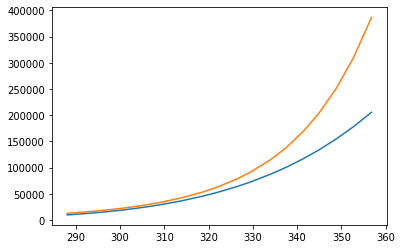

In [299]:
g = [3,  20, 10, 2e-5, 7.7e-5, 5e-5]

plt.plot(x["T"],x["p"])

n = len(x["T"])

y = np.empty(n)

for i in range(n):
    y[i] = psat(x["T"][i],g[0],g[1],g[2],g[3],g[4],g[5])
    
plt.plot(x["T"],y)


    

## Nonlinear least squares method from scipy

In [300]:
c, cov = curve_fit(psat, x["T"].values, x["p"].values, g)

print(c)

[-2.28036774e+02  1.30580929e+03  3.81959416e+04 -1.62072881e-01
  8.38271597e-05  4.88996462e+01]


## Plotting the function with obtained coefficients versus the literature values and calculating Residuals:

R^2 : 0.9999999774301432


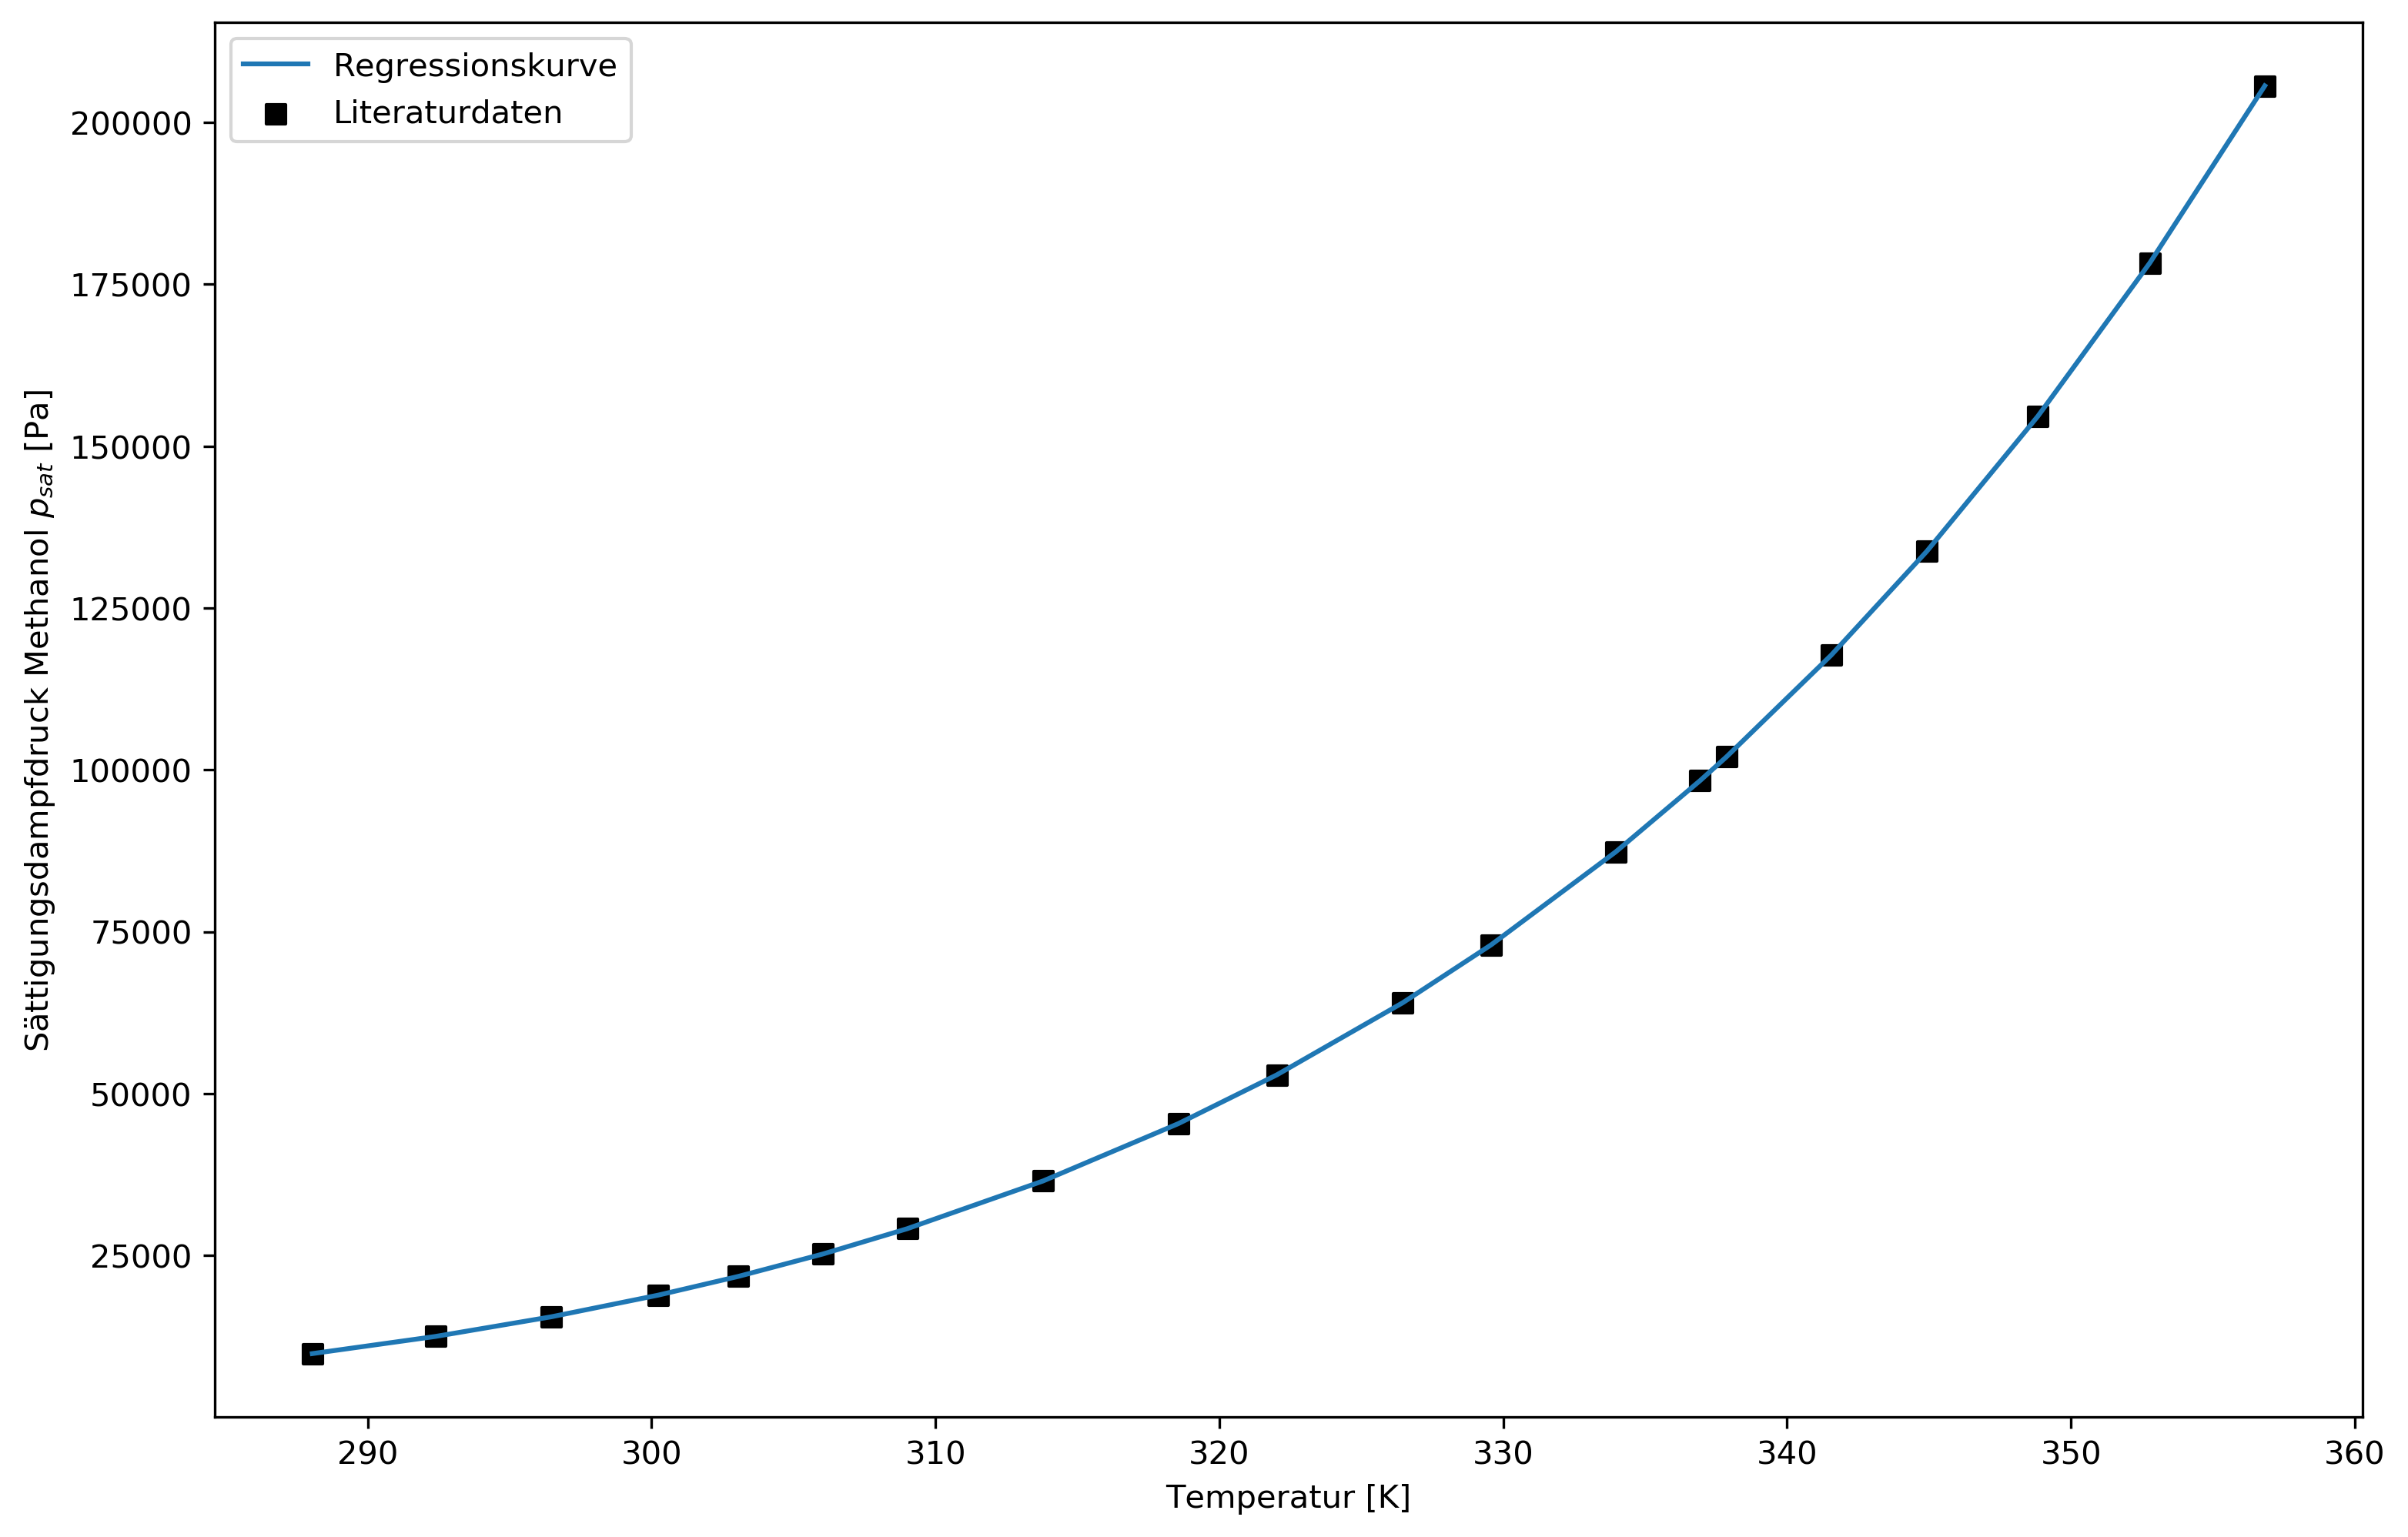

In [301]:


n = len(x["T"])

y = np.empty(n)

for i in range(n):
    y[i] = psat(x["T"][i],c[0],c[1],c[2],c[3],c[4],c[5])

fig = plt.figure(figsize=(12,8),dpi=300)    
plt.scatter(x["T"],x["p"], marker="s", color="black", label="Literaturdaten")    
plt.plot(x["T"],y, label="Regressionskurve")
plt.xlabel("Temperatur [K]")
plt.ylabel("Sättigungsdampfdruck Methanol $p_{sat}$ [Pa]")
plt.legend(loc="best")



print("R^2 :", r2_score(y, x["p"].values))



## Relative error is computed as $\frac{p_{calc} - p_{exp}}{p_{exp}} \cdot 100$

Text(0, 0.5, 'Relativer Fehler $(p_{ber} - p_{exp}) / p_{exp}*100$ [%]')

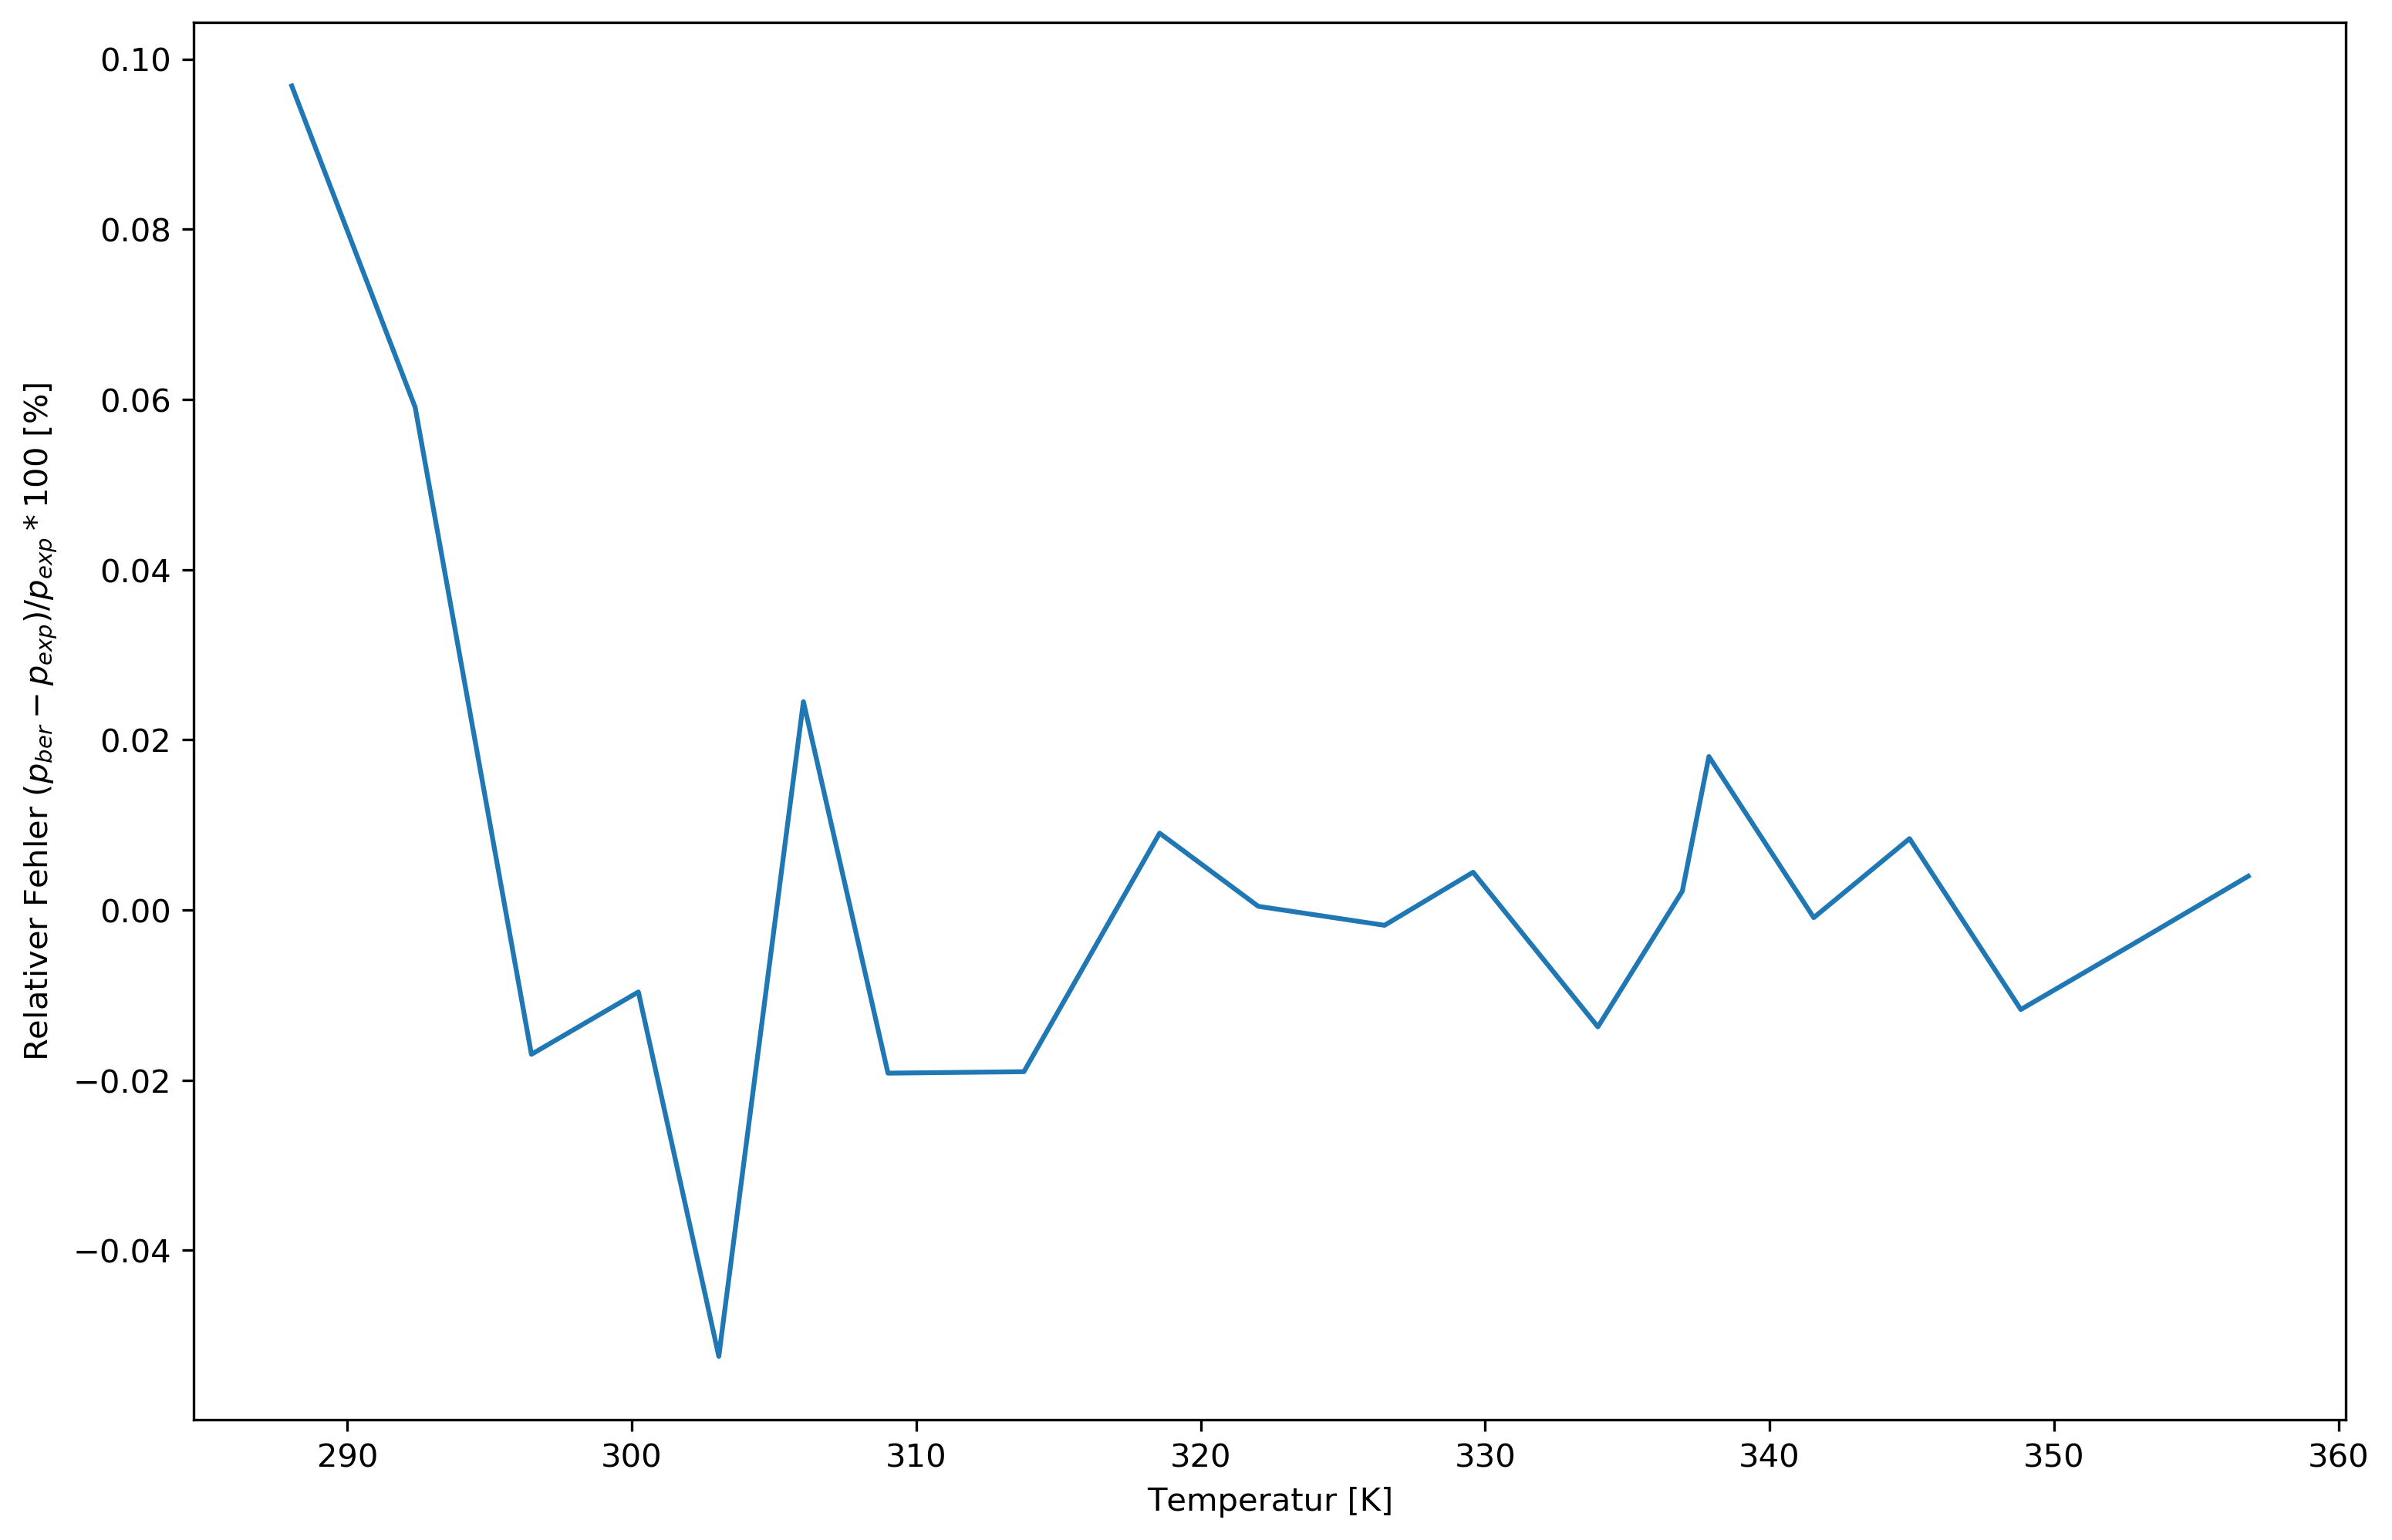

In [302]:
fig = plt.figure(figsize=(12,8),dpi=300)   
plt.plot(x["T"],(y-x["p"].values)/x["p"].values*100)
plt.xlabel("Temperatur [K]")
plt.ylabel("Relativer Fehler $(p_{ber} - p_{exp}) / p_{exp}*100$ [%]")